# Logistic Regression with ROC Curve & Deployment (Titanic Dataset)

This Google Colab notebook builds a **Logistic Regression model**, evaluates it using a **ROC Curve & AUC Score**, and demonstrates **model deployment** using saved models and real-time prediction.

---

## Step 1: Import Required Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import joblib


## Step 2: Load Titanic Dataset (Train & Test Files)

In [5]:

# Load datasets
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 3: Exploratory Data Analysis (EDA)

In [6]:

# Dataset info
train_df.info()

# Summary statistics
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


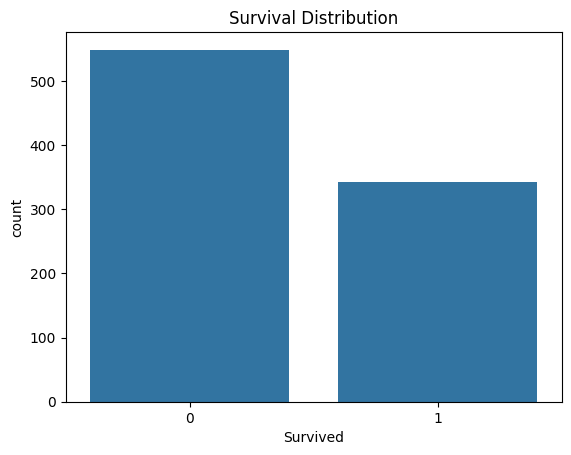

In [7]:

# Survival Distribution
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Distribution')
plt.show()


## Step 4: Data Preprocessing

In [8]:

# Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()

for col in ['Sex', 'Embarked']:
    train_df[col] = label_enc.fit_transform(train_df[col])
    test_df[col] = label_enc.transform(test_df[col])

train_df.head()


/tmp/ipython-input-1498550984.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipython-input-1498550984.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


## Step 5: Feature Selection & Train-Test Split

In [9]:

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Step 6: Logistic Regression Model Building

In [10]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## Step 7: Model Evaluation

In [11]:

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Step 8: ROC Curve & AUC Score (Important as per Note)

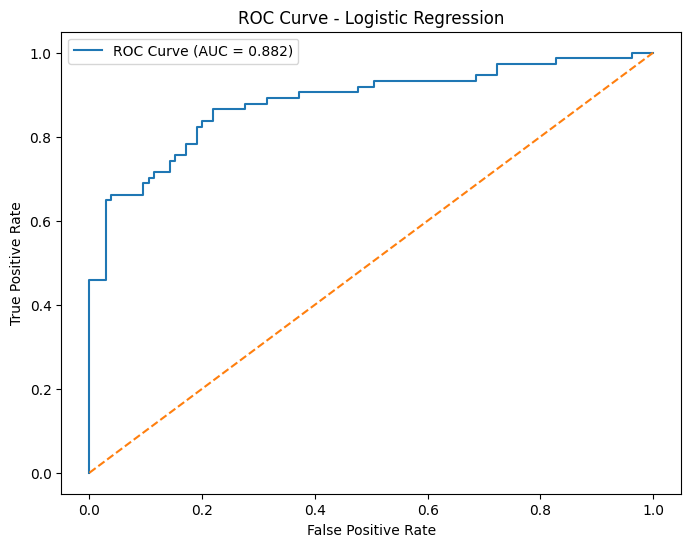

ROC-AUC Score: 0.8823680823680824


In [12]:

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

print("ROC-AUC Score:", auc_score)


## Step 9: Model Deployment - Save Trained Model

In [16]:

joblib.dump(model, 'titanic_logistic_model.pkl')
print("Model saved as titanic_logistic_model.pkl")


Model saved as titanic_logistic_model.pkl


## Step 10: Simulated Deployment - Load Model & Predict New Passenger

In [20]:

# Load model
loaded_model = joblib.load('titanic_logistic_model.pkl')
loaded_model

LogisticRegression(max_iter=1000)

In [18]:
# Example new passenger data
new_passenger = pd.DataFrame([{
    'Pclass': 3,
    'Sex': 1,   # 1 = male, 0 = female
    'Age': 25,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 2  # Encoded value
}])

prediction = loaded_model.predict(new_passenger)
probability = loaded_model.predict_proba(new_passenger)[:, 1]

print("Survival Prediction:", "Survived" if prediction[0] == 1 else "Not Survived")
print("Survival Probability:", probability[0])

Survival Prediction: Not Survived
Survival Probability: 0.11790504969559724


## Step 11: Interview Questions (Theory)

### 1. Difference Between Precision and Recall
- **Precision:** Out of all predicted positives, how many are actually positive.
- **Recall:** Out of all actual positives, how many did the model correctly identify.

### 2. What is Cross-Validation?
Cross-validation splits the dataset into multiple parts and trains/tests the model multiple times. This ensures the model is not overfitting and performs well on unseen data.

---

## Final Conclusion
This notebook demonstrates **model building, ROC curve evaluation, and deployment** of a Logistic Regression model using the Titanic dataset, fulfilling the assignment requirement to strengthen test statistics visualization and real-world usability.